<h1><center> The Best Basketball Player of our Generation </center></h1>

The 2020-2021 NBA season is coming to a close as the Milwauke Bucks are currently facing off against the Phoenix Suns in a best of 7 series. This past season was a wild return from the NBA bubble which forced players to stay confined in a resort at Disney World near Orlando Florida the season prior. This season had a tremendous amount of injuries including major figures such as Lebron James, James Harden, Kyrie Irving, Kawhi Leonard, Jamal Murray and much more. 

As we all know, basketball is a team sport where 5 players on one team play against 5 players on an opposing team. Each player has stats such as points, assists, rebounds, etc. which contributes to how great a player is. Decades ago, Michael Jordan shocked the world with his jaw dropping performances and scoring prowess. Following him Kobe Bryant carried the torch and was dubbed as the next Michael Jordan. Later came Lebron James with his abnormal size, speed, and longevity. 

While both Michael Jordan and Kobe have retired, Lebron James is still playing and proving his case for being the greatest player. Rivaling him currently are big name players such as: Stephen Curry a 2 time MVP and 3 time NBA champion; Kevin Durant, a NBA MVP and 2 time NBA champion. Kawhi Leonard, James Harden, and Anthony Davis are all more names that are amazing players with great stats. These players's success story all begs the question: Who is the greatest player of our generation?

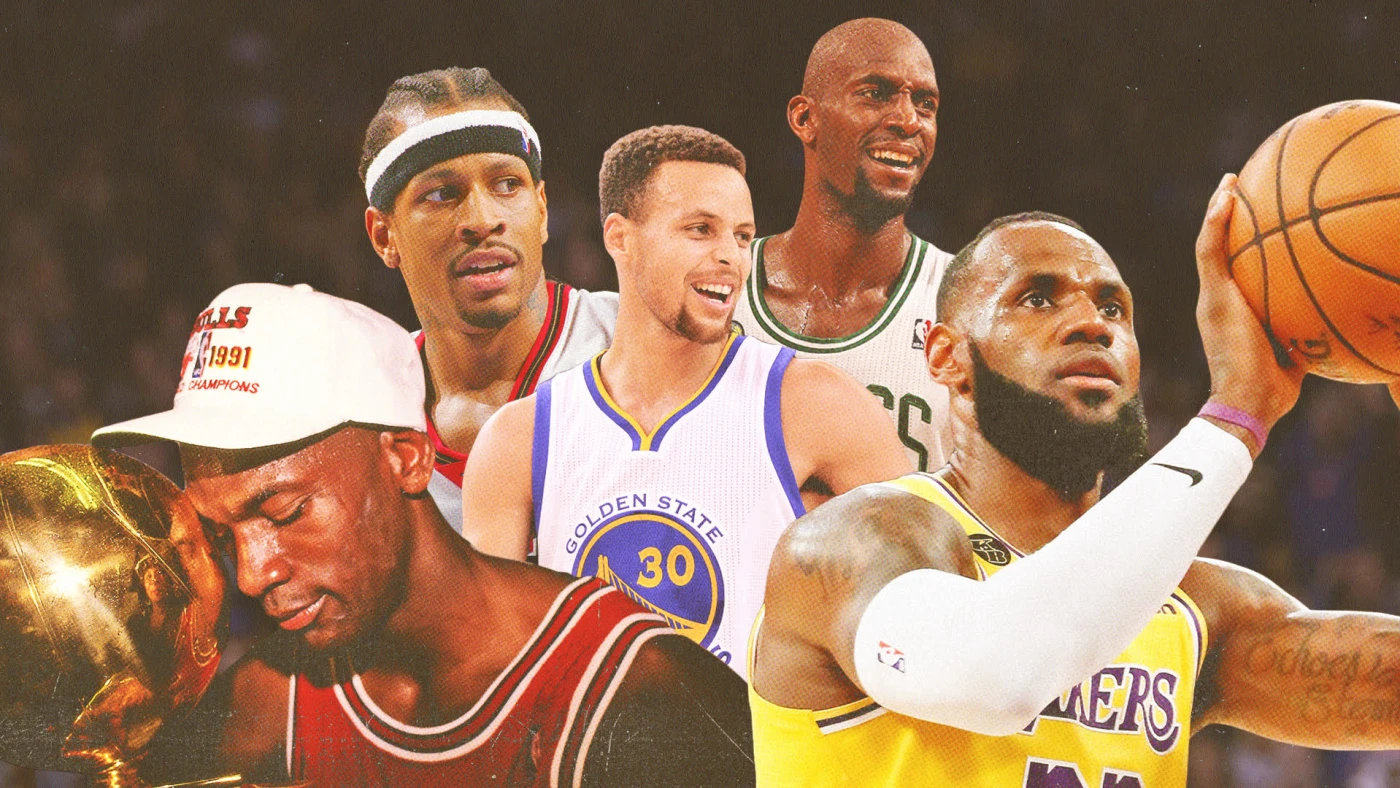

<b>Data Gathering</b> <br>
To begin we will import data from an excel file which contains data from players drafted from 1996 to the 2019 NBA season. This data is not up to date with the current NBA season but will be considering players up to the 2019 NBA season. Our data contains information pertaining to the amount of games played, minutes played, points per/game, 3 pt percentage, field goal percentage, rebounds, assists etc. Once we have this, we can begin tidying our data and figure out which player was the best player

In [104]:
import pandas as pd
import matplotlib.pyplot as plt 
import requests
import numpy as np
import matplotlib.pyplot as pyplt
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
!pip install folium
import folium
from folium.map import *
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("player_stats.csv")
data

Unnamed: 0         player_name team_abbreviation   age  player_height  \
0               0       Dennis Rodman               CHI  36.0         198.12   
1               1   Dwayne Schintzius               LAC  28.0         215.90   
2               2        Earl Cureton               TOR  39.0         205.74   
3               3         Ed O'Bannon               DAL  24.0         203.20   
4               4         Ed Pinckney               MIA  34.0         205.74   
...           ...                 ...               ...   ...            ...   
11140       11140         Maxi Kleber               DAL  28.0         208.28   
11141       11141  Melvin Frazier Jr.               ORL  23.0         195.58   
11142       11142      Meyers Leonard               MIA  28.0         213.36   
11143       11143        Norvel Pelle               PHI  27.0         208.28   
11144       11144         Matt Thomas               TOR  25.0         193.04   

       player_weight                      college  country draft_year  \
0          99.790240  Southeastern Oklahoma State      USA       1986   
1         117.933920                      Florida      USA       1990   
2          95.254320                Detroit Mercy      USA       1979   
3         100.697424                         UCLA      USA       1995   
4         108.862080                    Villanova      USA       1985   
...              ...                          ...      ...        ...   
11140     108.862080                         None  Germany  Undrafted   
11141      97.522280                       Tulane      USA       2018   
11142     117.933920                     Illinois      USA       2012   
11143     104.779752                         None      USA  Undrafted   
11144      86.182480                   Iowa State      USA  Undrafted   

      draft_round  ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  \
0               2  ...  5.7  16.1  3.1        16.1     0.186     0.323   
1               1  ...  2.3   1.5  0.3        12.3     0.078     0.151   
2               3  ...  0.8   1.0  0.4        -2.1     0.105     0.102   
3               1  ...  3.7   2.3  0.6        -8.7     0.060     0.149   
4               1  ...  2.4   2.4  0.2       -11.2     0.109     0.179   
...           ...  ...  ...   ...  ...         ...       ...       ...   
11140   Undrafted  ...  9.1   5.4  1.1         4.6     0.056     0.140   
11141           2  ...  1.2   0.3  0.1        -2.4     0.018     0.058   
11142           1  ...  6.1   5.1  1.1         5.6     0.029     0.217   
11143   Undrafted  ...  2.1   3.0  0.4       -16.4     0.085     0.237   
11144   Undrafted  ...  4.5   1.4  0.5         1.0     0.017     0.104   

       usg_pct  ts_pct  ast_pct   season  
0        0.100   0.479    0.113  1996-97  
1        0.175   0.430    0.048  1996-97  
2        0.103   0.376    0.148  1996-97  
3        0.167   0.399    0.077  1996-97  
4        0.127   0.611    0.040  1996-97  
...        ...     ...      ...      ...  
11140    0.136   0.605    0.064  2019-20  
11141    0.164   0.480    0.033  2019-20  
11142    0.120   0.640    0.076  2019-20  
11143    0.126   0.521    0.056  2019-20  
11144    0.149   0.663    0.089  2019-20  

[11145 rows x 22 columns]

<b> Data Tidying </b> <br>
Once we have all our data, we can begin sifting through and removing players who were drafted yet did not play in the NBA and also remove players who barely have any games played which I will deem as 30 or less games (a little less than half a season). This will help remove small sample data that could skew the results we are hoping to get. For example, someone who played 2 minutes and made a single shot will have a 100% field goal percentage which I hope does not give him credentials to be considered the greatest player for having never missed a shot in his career

In [105]:
for idx,row in data.iterrows():
    if row['team_abbreviation'] == 'SEA':
        data.at[idx, 'team_abbreviation']  = 'OKC'
    elif row['team_abbreviation'] == 'NJN':
        data.at[idx, 'team_abbreviation']  = 'BKN'
    elif row['team_abbreviation'] == 'NOH' or row['team_abbreviation'] == 'NOK':
        data.at[idx, 'team_abbreviation']  = 'NOP'
is_over_30_games = data['gp'] > 30
data = data[is_over_30_games]
is_over_1_shot_taken = data['ts_pct'] > 0.0
data = data[is_over_1_shot_taken]
data

Unnamed: 0          player_name team_abbreviation   age  player_height  \
0               0        Dennis Rodman               CHI  36.0         198.12   
3               3          Ed O'Bannon               DAL  24.0         203.20   
5               5        Eddie Johnson               HOU  38.0         200.66   
6               6          Eddie Jones               LAL  25.0         198.12   
7               7       Elden Campbell               LAL  28.0         213.36   
...           ...                  ...               ...   ...            ...   
11137       11137  Matthew Dellavedova               CLE  29.0         190.50   
11138       11138     Maurice Harkless               NYK  26.0         200.66   
11140       11140          Maxi Kleber               DAL  28.0         208.28   
11142       11142       Meyers Leonard               MIA  28.0         213.36   
11144       11144          Matt Thomas               TOR  25.0         193.04   

       player_weight                      college    country draft_year  \
0          99.790240  Southeastern Oklahoma State        USA       1986   
3         100.697424                         UCLA        USA       1995   
5          97.522280                     Illinois        USA       1981   
6          86.182480                       Temple        USA       1994   
7         113.398000                      Clemson        USA       1990   
...              ...                          ...        ...        ...   
11137      90.718400              St. Mary's (CA)  Australia  Undrafted   
11138      99.790240             St. John's, N.Y.        USA       2012   
11140     108.862080                         None    Germany  Undrafted   
11142     117.933920                     Illinois        USA       2012   
11144      86.182480                   Iowa State        USA  Undrafted   

      draft_round  ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  \
0               2  ...   5.7  16.1  3.1        16.1     0.186     0.323   
3               1  ...   3.7   2.3  0.6        -8.7     0.060     0.149   
5               2  ...   8.2   2.7  1.0         4.1     0.034     0.126   
6               1  ...  17.2   4.1  3.4         4.1     0.035     0.091   
7               1  ...  14.9   8.0  1.6         3.3     0.095     0.183   
...           ...  ...   ...   ...  ...         ...       ...       ...   
11137   Undrafted  ...   2.8   1.3  2.9        -0.9     0.024     0.069   
11138           1  ...   5.7   3.9  1.0         1.9     0.038     0.119   
11140   Undrafted  ...   9.1   5.4  1.1         4.6     0.056     0.140   
11142           1  ...   6.1   5.1  1.1         5.6     0.029     0.217   
11144   Undrafted  ...   4.5   1.4  0.5         1.0     0.017     0.104   

       usg_pct  ts_pct  ast_pct   season  
0        0.100   0.479    0.113  1996-97  
3        0.167   0.399    0.077  1996-97  
5        0.220   0.541    0.102  1996-97  
6        0.209   0.559    0.149  1996-97  
7        0.222   0.520    0.087  1996-97  
...        ...     ...      ...      ...  
11137    0.129   0.445    0.292  2019-20  
11138    0.104   0.575    0.059  2019-20  
11140    0.136   0.605    0.064  2019-20  
11142    0.120   0.640    0.076  2019-20  
11144    0.149   0.663    0.089  2019-20  

[8499 rows x 22 columns]

The next step of our data tidying is to first find the best shooter of our generation and remove data that we don't find relevant. Being a good player means that you must be good at scoring the basket which is key to winning games. We can also create a new dataset that has only the information we need to conduct this research such as field goal percentage, points, games, etc.

In [37]:
shooting_data = data[['season', 'team_abbreviation', 'player_name', 'gp', 'pts', 'reb', 'ast', 'ts_pct', 'ast_pct', 'oreb_pct', 'dreb_pct']]
# sort by true shooting percentage
shooting_data.sort_values('ts_pct', ascending = False)

season team_abbreviation        player_name  gp  pts  reb  ast  \
9674   2017-18               CLE         Ante Zizic  32  3.7  1.9  0.2   
7645   2013-14               LAC       Ryan Hollins  61  2.3  1.5  0.1   
7511   2012-13               BOS       Chris Wilcox  61  4.2  3.0  0.4   
11088  2019-20               NYK  Mitchell Robinson  58  9.5  7.0  0.6   
11101  2019-20               OKC       Nerlens Noel  54  7.8  4.9  1.0   
...        ...               ...                ...  ..  ...  ...  ...   
3321   2003-04               DET      Darko Milicic  34  1.4  1.3  0.2   
1934   2000-01               CHI    Dalibor Bagaric  35  1.3  1.6  0.3   
3841   2004-05               CLE      DeSagana Diop  39  1.0  1.8  0.4   
8250   2014-15               GSW       Brandon Rush  33  0.9  1.2  0.4   
2134   2000-01               NYK      Travis Knight  45  0.6  1.2  0.1   

       ts_pct  ast_pct  oreb_pct  dreb_pct  
9674    0.746    0.039     0.112     0.179  
7645    0.730    0.026     0.076     0.126  
7511    0.725    0.041     0.081     0.164  
11088   0.719    0.041     0.121     0.163  
11101   0.717    0.083     0.084     0.172  
...       ...      ...       ...       ...  
3321    0.318    0.095     0.080     0.212  
1934    0.304    0.065     0.091     0.158  
3841    0.281    0.084     0.106     0.153  
8250    0.255    0.063     0.015     0.154  
2134    0.238    0.038     0.088     0.150  

[8499 rows x 11 columns]

In [38]:
# sort by assists
shooting_data.sort_values('ast', ascending = False)

season team_abbreviation        player_name  gp   pts   reb   ast  \
9304  2016-17               OKC  Russell Westbrook  81  31.6  10.7  10.4   
5588  2008-09               NOP         Chris Paul  78  22.8   5.5  11.0   
9249  2016-17               HOU       James Harden  81  29.1   8.1  11.2   
5056  2007-08               NOP         Chris Paul  80  21.1   4.0  11.6   
6555  2010-11               PHX         Steve Nash  75  14.7   3.5  11.4   
...       ...               ...                ...  ..   ...   ...   ...   
6324  2010-11               LAC          Ike Diogu  36   5.8   3.2   0.1   
4381  2005-06               HOU    Dikembe Mutombo  64   2.6   4.8   0.1   
5859  2009-10               MIA    Jamaal Magloire  36   2.1   3.4   0.0   
5829  2009-10               POR         Jeff Ayres  39   2.7   2.5   0.0   
5240  2007-08               ATL      Solomon Jones  35   1.0   1.2   0.0   

      ts_pct  ast_pct  oreb_pct  dreb_pct  
9304   0.554    0.543     0.053     0.279  
5588   0.599    0.512     0.028     0.143  
9249   0.613    0.505     0.035     0.212  
5056   0.576    0.500     0.024     0.103  
6555   0.601    0.498     0.019     0.099  
...      ...      ...       ...       ...  
6324   0.590    0.008     0.096     0.188  
4381   0.626    0.007     0.132     0.255  
5859   0.470    0.005     0.133     0.261  
5829   0.705    0.004     0.081     0.232  
5240   0.451    0.000     0.127     0.185  

[8499 rows x 11 columns]

In [106]:
# sort by rebounds
shooting_data.sort_values('reb', ascending = False)

season team_abbreviation          player_name  gp   pts   reb  ast  \
0      1996-97               CHI        Dennis Rodman  55   5.7  16.1  3.1   
9666   2017-18               DET       Andre Drummond  78  15.0  16.0  3.0   
10272  2018-19               DET       Andre Drummond  79  17.3  15.6  1.4   
2735   2002-03               DET          Ben Wallace  73   6.9  15.4  1.6   
10808  2019-20               CLE       Andre Drummond  55  17.5  15.3  2.7   
...        ...               ...                  ...  ..   ...   ...  ...   
4424   2005-06               IND           Eddie Gill  41   1.1   0.4  0.3   
10050  2017-18               MIN  Marcus Georges-Hunt  42   1.4   0.4  0.2   
8252   2014-15               LAC        Dahntay Jones  33   0.6   0.3  0.1   
724    1997-98               MIN         DeJuan Wheat  34   1.7   0.3  0.7   
2218   2001-02               SAC       Mateen Cleaves  32   2.2   0.3  0.8   

       ts_pct  ast_pct  oreb_pct  dreb_pct   score  
0       0.479    0.113     0.186     0.323  26.001  
9666    0.555    0.140     0.145     0.329  35.169  
10272   0.555    0.068     0.151     0.311  35.385  
2735    0.486    0.069     0.120     0.345  24.920  
10808   0.549    0.135     0.130     0.339  36.653  
...       ...      ...       ...       ...     ...  
4424    0.408    0.176     0.000     0.128   2.512  
10050   0.515    0.045     0.030     0.043   2.633  
8252    0.406    0.027     0.008     0.093   1.534  
724     0.504    0.269     0.021     0.057   3.551  
2218    0.486    0.253     0.007     0.043   4.089  

[8499 rows x 12 columns]

<b> Visualization </b><br>
Now I plotted the data on a scatterplot seeing how shooting has evolved from 1996 as well as shooting data compared to games played. The first graph will be used to check whether or not shooting in recent years is better than shooting in previous years as the game develops and more players have access to the previous great players' game replays. The second graph is used to check whether players who played more games truly do shoot better than players who play less. Logically speaking, players who play more games should have a higher shooting percentage than those who play less due to the fact that they either practice more, or simply play better than other players therefore they are given a bigger role.

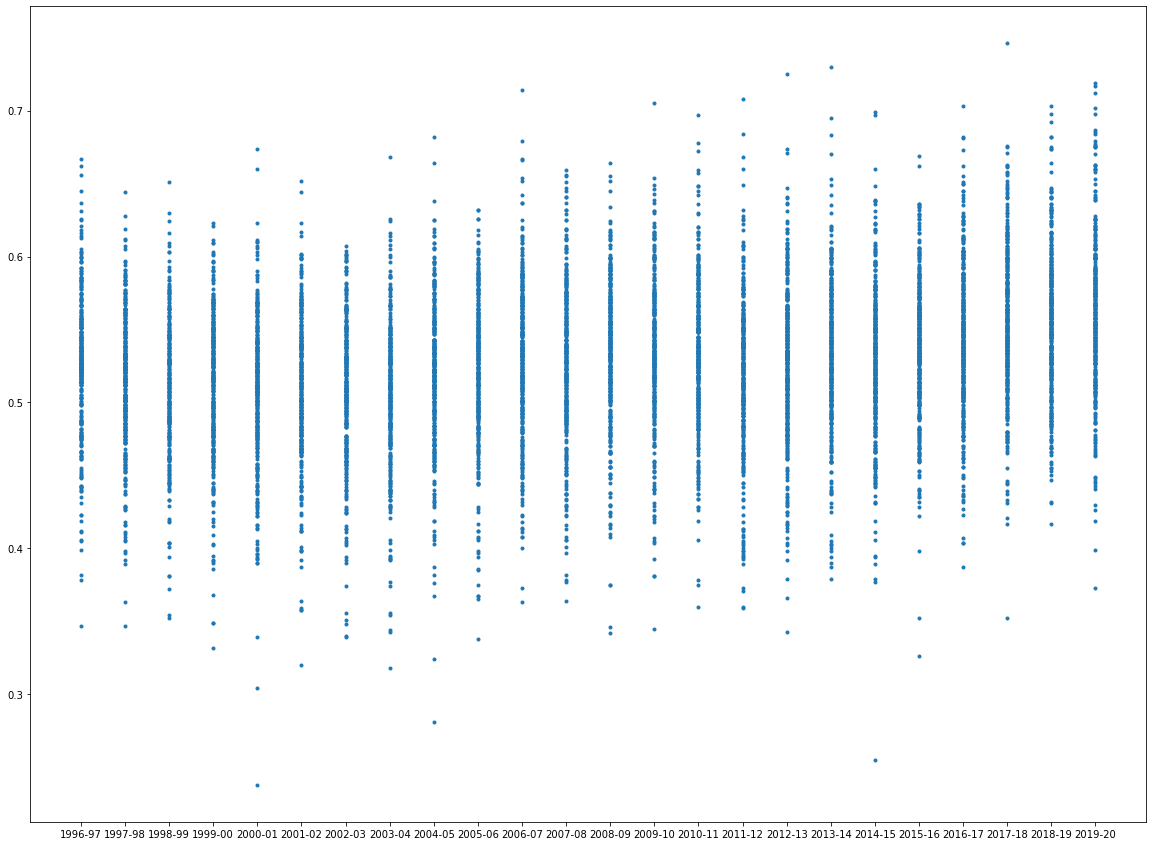

In [41]:
plt.figure(figsize = (20, 15))
plt.plot(shooting_data['season'], shooting_data['ts_pct'],'.')

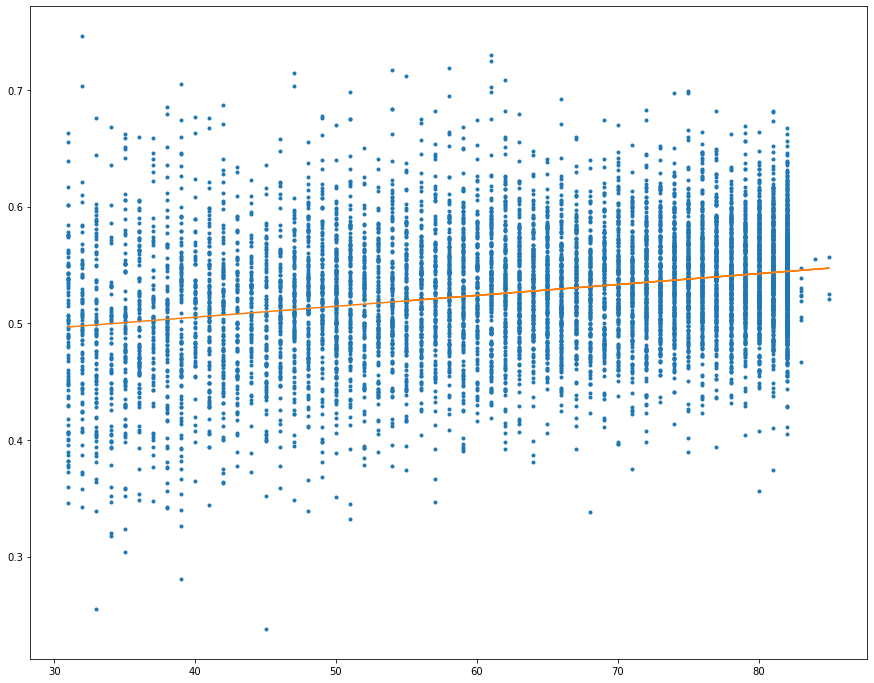

In [42]:
plt.figure(figsize = (15, 12))
plt.plot(shooting_data['gp'], shooting_data['ts_pct'],'.')
m, b = np.polyfit(shooting_data['gp'], shooting_data['ts_pct'], 1)
plt.plot(shooting_data['gp'], m* shooting_data['gp'] + b)

<b> More Visualization </b> <br>
To get a better understanding of where each player stands compared to others I decided to create a formula for each player and added their offensive stats to their defensive stats and their points in order to denote who had the most impact on both ends of the floor.

In [107]:
shooting_data1 = shooting_data
for idx, row in shooting_data1.iterrows():
    shooting_data1.at[idx, 'score'] = row['ts_pct'] + row['ast_pct'] + row['oreb_pct'] +row['dreb_pct'] + row['pts'] + row['reb'] + row['ast']
shooting_data1.sort_values('score', ascending = False)

season team_abbreviation            player_name  gp   pts   reb   ast  \
9304   2016-17               OKC      Russell Westbrook  81  31.6  10.7  10.4   
10219  2018-19               HOU           James Harden  78  36.1   6.6   7.5   
10638  2019-20               MIL  Giannis Antetokounmpo  57  29.6  13.7   5.8   
9249   2016-17               HOU           James Harden  81  29.1   8.1  11.2   
10746  2019-20               HOU           James Harden  59  34.5   6.4   7.4   
...        ...               ...                    ...  ..   ...   ...   ...   
4424   2005-06               IND             Eddie Gill  41   1.1   0.4   0.3   
3774   2004-05               DET             Darvin Ham  47   1.0   0.7   0.1   
2134   2000-01               NYK          Travis Knight  45   0.6   1.2   0.1   
9992   2017-18               POR            Jake Layman  35   1.0   0.5   0.3   
8252   2014-15               LAC          Dahntay Jones  33   0.6   0.3   0.1   

       ts_pct  ast_pct  oreb_pct  dreb_pct   score  
9304    0.554    0.543     0.053     0.279  54.129  
10219   0.616    0.394     0.023     0.157  51.390  
10638   0.608    0.330     0.069     0.305  50.412  
9249    0.613    0.505     0.035     0.212  49.765  
10746   0.616    0.355     0.026     0.132  49.429  
...       ...      ...       ...       ...     ...  
4424    0.408    0.176     0.000     0.128   2.512  
3774    0.454    0.035     0.094     0.079   2.462  
2134    0.238    0.038     0.088     0.150   2.414  
9992    0.352    0.099     0.024     0.078   2.353  
8252    0.406    0.027     0.008     0.093   1.534  

[8499 rows x 12 columns]

In [108]:
# draft round 1 data
draft_data1 = data[['team_abbreviation', 'draft_number', 'draft_round']]
draft_data1['Team'] = draft_data1['team_abbreviation']
drafted_round1 = data['draft_round'] == '1'
draft_data1 = draft_data1[drafted_round1]

# draft round 2 data
draft_data2 = data[['team_abbreviation', 'draft_number', 'draft_round']]
draft_data2['Team'] = draft_data2['team_abbreviation']
drafted_round2 = data['draft_round'] == '2'
draft_data2 = draft_data2[drafted_round2]

#combine draft round 1 and 2 data
frames = [draft_data1, draft_data2]
draft_data = pd.concat(frames)
draft_data = draft_data.astype({'draft_number': 'int32'})
draft_data = draft_data.groupby('Team', as_index = False).agg({'draft_number': 'mean'})
draft_data

Team  draft_number
0   ATL     21.062500
1   BKN     20.835249
2   BOS     19.559387
3   CHA     18.596491
4   CHH     20.490566
5   CHI     18.881148
6   CLE     19.339921
7   DAL     17.635983
8   DEN     20.657480
9   DET     18.316964
10  GSW     17.231707
11  HOU     20.733333
12  IND     21.246154
13  LAC     19.715415
14  LAL     19.438202
15  MEM     20.936893
16  MIA     18.946903
17  MIL     21.478927
18  MIN     19.086275
19  NOP     20.537234
20  NYK     18.086420
21  OKC     19.126984
22  ORL     19.538462
23  PHI     22.168724
24  PHX     18.206349
25  POR     15.984791
26  SAC     19.944223
27  SAS     25.828000
28  TOR     21.400000
29  UTA     24.574219
30  VAN     19.901961
31  WAS     20.461240

<b> More Visualization and Machine Learning </b> <br>
For more visualization, I decided to plot the score of the teams on a map of the US denoted by where their stadiums are located. If they had an above average score, they would be plotted in green and below average will be red. The deeper the hue indicates the further they are from the average. <br>
To get the location of the stadiums, we scraped data from the web in order to plot the latitude and logitude of the stadiums on a map.

In [93]:
import re
r = requests.get('http://lionstobakersfield.blogspot.com/2019/01/nba-arenas-with-latitude-and-longitude.html')
root = BeautifulSoup(r.content, 'html')
table = root.find('table').prettify()

teams = pd.read_html(table)[0]

columns = ['Team', 'arena_name', 'latitude', 'longitude']

teams.columns = columns

abbrevs = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM',
            'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

teams['Team'] = abbrevs

# decimal number for longitude/latitude
regex = '\d+.\d+'

for idx, row in teams.iterrows():
    lat_reg = re.search(regex, row['latitude'])
    teams.at[idx, 'latitude'] = lat_reg.group(0)
    long_reg = re.search(regex, row['longitude'])
    #longitudes are west, therefore make them negative
    teams.at[idx, 'longitude'] = '-' + long_reg.group(0)

teams = pd.merge(teams, draft_data, on = 'Team')
teams

Team                  arena_name latitude longitude  draft_number
0   ATL            State Farm Arena   33.757   -84.396     21.062500
1   BOS                   TD Garden   42.366   -71.062     19.559387
2   BKN             Barclays Center   40.683   -73.975     20.835249
3   CHA             Spectrum Center   35.225   -80.839     18.596491
4   CHI               United Center   41.881   -87.675     18.881148
5   CLE         Quicken Loans Arena   41.497   -81.688     19.339921
6   DAL    American Airlines Center   32.791    -96.81     17.635983
7   DEN                Pepsi Center   39.749  -105.008     20.657480
8   DET        Little Caesars Arena   42.341   -83.055     18.316964
9   GSW                Oracle Arena    37.75  -122.203     17.231707
10  HOU               Toyota Center   29.751   -95.362     20.733333
11  IND     Bankers Life Fieldhouse   39.764   -86.156     21.246154
12  LAC              Staples Center   34.043  -118.267     19.715415
13  LAL              Staples Center   34.043  -118.267     19.438202
14  MEM                  FedExForum   35.156   -90.052     20.936893
15  MIA    American Airlines  Arena   25.781   -80.187     18.946903
16  MIL                Fiserv Forum   43.045   -87.917     21.478927
17  MIN               Target Center    44.98   -93.276     19.086275
18  NOP        Smoothie King Center   29.949   -90.082     20.537234
19  NYK       Madison Square Garden   40.751   -73.993     18.086420
20  OKC     Chesapeake Energy Arena   35.463   -97.515     19.126984
21  ORL                Amway Center   28.539   -81.384     19.538462
22  PHI          Wells Fargo Center   39.901   -75.172     22.168724
23  PHX  Talking Stick Resort Arena   33.446  -112.071     18.206349
24  POR                 Moda Center   45.532  -122.667     15.984791
25  SAC             Golden 1 Center    38.58    -121.5     19.944223
26  SAS                 AT&T Center   29.427   -98.438     25.828000
27  TOR            Scotiabank Arena   43.644   -79.379     21.400000
28  UTA     Vivint Smart Home Arena   40.768  -111.901     24.574219
29  WAS           Capital One Arena   38.898   -77.021     20.461240

Now create a dataframe for scores for each team by adding up all the total players' scores that played for that team each season. This will help determine which team was the best throughout the past 25 years. We also wish to add [championship data information](https://ca.nba.com/news/nba-finals-most-championships-won-by-nba-franchise-boston-celtics-los-angeles-lakers/15t9wz5dcll3h1nr17bf7bd96w) in order to determine which team was the best team.  

In [99]:
new_data = pd.DataFrame(columns = ['Team', 'score'])
new_data['Team'] = abbrevs
new_data['score'] = 0
ATL_scoring = 0
BOS_scoring = 0
BKN_scoring = 0
CHA_scoring = 0
CHI_scoring = 0
CLE_scoring = 0
DAL_scoring = 0
DEN_scoring = 0
DET_scoring = 0
GSW_scoring = 0
HOU_scoring = 0
IND_scoring = 0
LAC_scoring = 0
LAL_scoring = 0
MEM_scoring = 0
MIA_scoring = 0
MIL_scoring = 0
MIN_scoring = 0
NOP_scoring = 0
NYK_scoring = 0
OKC_scoring = 0
ORL_scoring = 0
PHI_scoring = 0
PHX_scoring = 0
POR_scoring = 0
SAC_scoring = 0
SAS_scoring = 0
TOR_scoring = 0
UTA_scoring = 0
WAS_scoring = 0
for idx, row in shooting_data.iterrows():
    if row['team_abbreviation'] == 'ATL':
        ATL_scoring += row['score']
    if row['team_abbreviation'] == 'BOS':
        BOS_scoring += row['score']
    if row['team_abbreviation'] == 'BKN':
        BKN_scoring += row['score']
    if row['team_abbreviation'] == 'CHA':
        CHA_scoring += row['score']
    if row['team_abbreviation'] == 'CHI':
        CHI_scoring += row['score']
    if row['team_abbreviation'] == 'CLE':
        CLE_scoring += row['score']
    if row['team_abbreviation'] == 'DAL':
        DAL_scoring += row['score']
    if row['team_abbreviation'] == 'DEN':
        DEN_scoring += row['score']
    if row['team_abbreviation'] == 'DET':
        DET_scoring += row['score']
    if row['team_abbreviation'] == 'GSW':
        GSW_scoring += row['score']
        
    if row['team_abbreviation'] == 'HOU':
        HOU_scoring += row['score']
    if row['team_abbreviation'] == 'IND':
        IND_scoring += row['score']
    if row['team_abbreviation'] == 'LAC':
        LAC_scoring += row['score']
    if row['team_abbreviation'] == 'LAL':
        LAL_scoring += row['score']
    if row['team_abbreviation'] == 'MEM':
        MEM_scoring += row['score']
    if row['team_abbreviation'] == 'MIA':
        MIA_scoring += row['score']
    if row['team_abbreviation'] == 'MIL':
        MIL_scoring += row['score']
    if row['team_abbreviation'] == 'MIN':
        MIN_scoring += row['score']
    if row['team_abbreviation'] == 'NOP':
        NOP_scoring += row['score']
    if row['team_abbreviation'] == 'NYK':
        NYK_scoring += row['score']
        
    if row['team_abbreviation'] == 'OKC':
        OKC_scoring += row['score']
    if row['team_abbreviation'] == 'ORL':
        ORL_scoring += row['score']
    if row['team_abbreviation'] == 'PHI':
        PHI_scoring += row['score']
    if row['team_abbreviation'] == 'PHX':
        PHX_scoring += row['score']
    if row['team_abbreviation'] == 'POR':
        POR_scoring += row['score']
    if row['team_abbreviation'] == 'SAC':
        SAC_scoring += row['score']
    if row['team_abbreviation'] == 'SAS':
        SAS_scoring += row['score']
    if row['team_abbreviation'] == 'TOR':
        TOR_scoring += row['score']
    if row['team_abbreviation'] == 'UTA':
        UTA_scoring += row['score']
    if row['team_abbreviation'] == 'WAS':
        WAS_scoring += row['score']    
new_data['score'] = [ATL_scoring, BOS_scoring, BKN_scoring, CHA_scoring, CHI_scoring, CLE_scoring, DAL_scoring,
                     DEN_scoring, DET_scoring, GSW_scoring, HOU_scoring, IND_scoring, LAC_scoring, LAL_scoring,
                     MEM_scoring, MIA_scoring, MIL_scoring, MIN_scoring, NOP_scoring, NYK_scoring, OKC_scoring,
                     ORL_scoring, PHI_scoring, PHX_scoring, POR_scoring, SAC_scoring, SAS_scoring, TOR_scoring,
                     UTA_scoring, WAS_scoring]
new_data['championships'] = [0, 17, 0, 0, 6, 1, 1, 0, 3, 6, 2, 0, 0, 17, 0, 3, 1, 0, 0, 2, 1, 0, 3, 0, 1, 1, 5, 1, 0, 1]
team_scores_and_locations = pd.merge(new_data, teams, on = 'Team')
team_scores_and_locations.sort_values('score', ascending = False)

Team     score  championships                  arena_name latitude  \
13  LAL  5028.959             17              Staples Center   34.043   
16  MIL  4918.894              1                Fiserv Forum   43.045   
7   DEN  4910.418              0                Pepsi Center   39.749   
10  HOU  4890.795              2               Toyota Center   29.751   
9   GSW  4876.287              6                Oracle Arena    37.75   
6   DAL  4871.395              1    American Airlines Center   32.791   
23  PHX  4850.378              0  Talking Stick Resort Arena   33.446   
12  LAC  4838.344              0              Staples Center   34.043   
11  IND  4837.596              0     Bankers Life Fieldhouse   39.764   
5   CLE  4829.200              1         Quicken Loans Arena   41.497   
15  MIA  4821.675              3    American Airlines  Arena   25.781   
25  SAC  4813.182              1             Golden 1 Center    38.58   
17  MIN  4807.422              0               Target Center    44.98   
29  WAS  4787.661              1           Capital One Arena   38.898   
1   BOS  4763.813             17                   TD Garden   42.366   
4   CHI  4747.858              6               United Center   41.881   
2   BKN  4732.580              0             Barclays Center   40.683   
22  PHI  4723.901              3          Wells Fargo Center   39.901   
28  UTA  4719.847              0     Vivint Smart Home Arena   40.768   
27  TOR  4712.113              1            Scotiabank Arena   43.644   
26  SAS  4709.457              5                 AT&T Center   29.427   
24  POR  4678.881              1                 Moda Center   45.532   
19  NYK  4676.415              2       Madison Square Garden   40.751   
21  ORL  4648.932              0                Amway Center   28.539   
20  OKC  4644.669              1     Chesapeake Energy Arena   35.463   
0   ATL  4588.078              0            State Farm Arena   33.757   
8   DET  4492.806              3        Little Caesars Arena   42.341   
18  NOP  3687.056              0        Smoothie King Center   29.949   
14  MEM  3666.825              0                  FedExForum   35.156   
3   CHA  3172.363              0             Spectrum Center   35.225   

   longitude  draft_number  
13  -118.267     19.438202  
16   -87.917     21.478927  
7   -105.008     20.657480  
10   -95.362     20.733333  
9   -122.203     17.231707  
6     -96.81     17.635983  
23  -112.071     18.206349  
12  -118.267     19.715415  
11   -86.156     21.246154  
5    -81.688     19.339921  
15   -80.187     18.946903  
25    -121.5     19.944223  
17   -93.276     19.086275  
29   -77.021     20.461240  
1    -71.062     19.559387  
4    -87.675     18.881148  
2    -73.975     20.835249  
22   -75.172     22.168724  
28  -111.901     24.574219  
27   -79.379     21.400000  
26   -98.438     25.828000  
24  -122.667     15.984791  
19   -73.993     18.086420  
21   -81.384     19.538462  
20   -97.515     19.126984  
0    -84.396     21.062500  
8    -83.055     18.316964  
18   -90.082     20.537234  
14   -90.052     20.936893  
3    -80.839     18.596491

Now with the dataframe with the stadium data as well as the score, we can get data on the residuals from our model using statsmodels.

In [115]:
import statsmodels.api as sm
X = team_scores_and_locations['draft_number']
Y = team_scores_and_locations['score']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
resids = model.resid
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                  0.004795
Date:                Tue, 20 Jul 2021   Prob (F-statistic):              0.945
Time:                        19:50:26   Log-Likelihood:                -222.43
No. Observations:                  30   AIC:                             448.9
Df Residuals:                      28   BIC:                             451.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4594.7825    776.000      5.921   

Here we plot a pie chart of the data of how each team does relative to others in terms of the team's total score from 1996-2019. From the looks of it, the Los Angeles Lakers should have the highest percentage of the pie chart followed by the Houston Rockets. The New Orleans Pelicans have the lowest percentage of the total score of being a small market team and having few super stars in the past 25 years. 

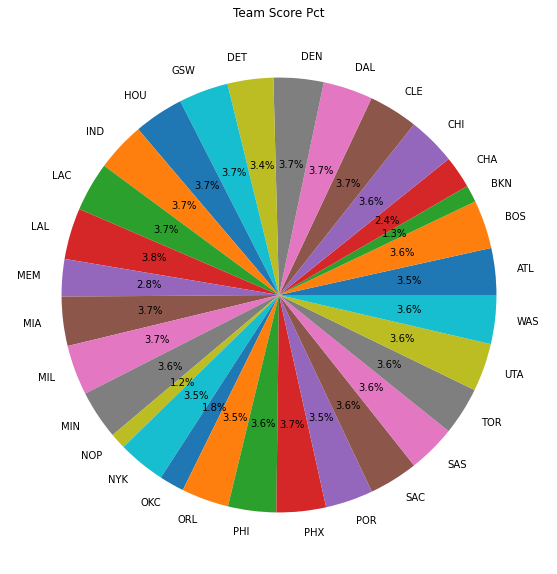

In [33]:
my_labels = 'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', \
            'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
my_data = team_scores_and_locations.astype({'score': float})
plt.figure(figsize = (10, 10))
plt.pie(team_scores_and_locations['score'], labels = my_labels, autopct = '%1.1f%%')
plt.title('Team Score Pct')
plt.show()

Here we plot the pie chart of championships won by teams. Basketball is a team sport where a team's success is more important than individual player success. In recent NBA history the Lakers have won a majority of the championships having won 5 from 2000-2010.

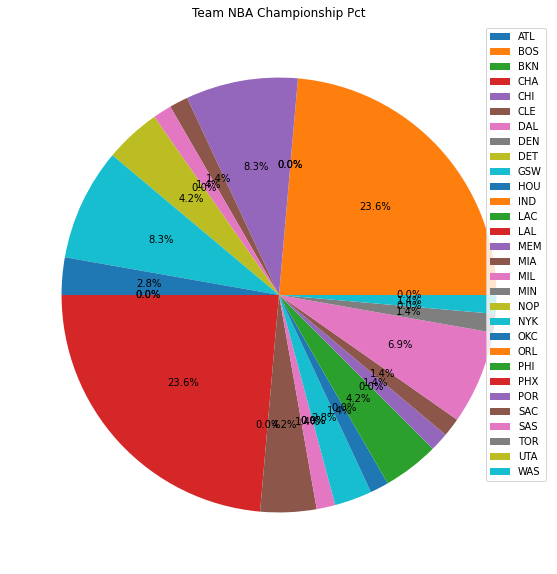

In [117]:
my_labels = 'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', \
            'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
my_data = team_scores_and_locations.astype({'score': 'int32'})
plt.figure(figsize = (10, 10))
plt.pie(team_scores_and_locations['championships'], autopct = '%1.1f%%')
plt.legend(my_labels, loc='upper right')
plt.title('Team NBA Championship Pct')
plt.show()

Now we can plot our data on a map, marking each of the teams' stadiums. Teams that had worse overall performers will be red colored, whereas teams that perform better will slowly change colors to become more green. The more green colored icons will be teams that performed better. When clicking on the icon, the team as well as their overall score will popup.

In [35]:
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=3)
for idx, row in team_scores_and_locations.iterrows():
    if row['score'] < 2000:
        folium.Marker(location = [row['latitude'], row['longitude']], 
                      popup = 'Team: ' + str(row['Team']) + 'Score: ' + str(row['score']),
                     icon=folium.Icon(color='red')).add_to(map_osm)
    if row['score'] > 2000 and row['score'] < 3000:
        folium.Marker(location = [row['latitude'], row['longitude']], 
                      popup = 'Team: ' + str(row['Team']) + 'Score: ' + str(row['score']),
                     icon=folium.Icon(color='orange')).add_to(map_osm)
    if row['score'] > 3000 and row['score'] < 4000:
        folium.Marker(location = [row['latitude'], row['longitude']], 
                      popup = 'Team: ' + str(row['Team']) + 'Score: ' + str(row['score']),
                     icon=folium.Icon(color='white')).add_to(map_osm)
    if row['score'] > 4000 and row['score'] < 5000:
        folium.Marker(location = [row['latitude'], row['longitude']], 
                      popup = 'Team: ' + str(row['Team']) + 'Score: ' + str(row['score']),
                     icon=folium.Icon(color='lightgreen')).add_to(map_osm)
    if row['score'] > 5000:
        folium.Marker(location = [row['latitude'], row['longitude']], 
                      popup = 'Team: ' + str(row['Team']) + 'Score: ' + str(row['score']),
                     icon=folium.Icon(color='green')).add_to(map_osm)
map_osm

<b> Conclusion </b> <br>
The NBA is a very competitive league in which players grind day in and day out. Players are always striving to get better at scoring, rebounding, assisting and teams are always striving to get more wins. A team's success is driven by their players' success and a players' success is driven by a team's success. In the end, the coveted prize in the [NBA championship](https://en.wikipedia.org/wiki/List_of_NBA_players_with_most_championships). <br>
Look at James Harden and Kobe Bryant for example, both players with amazing scoring abilities. One player played a majority of his career in Houston for the Rockets while the other played as a lifetime Los Angeles Laker. One player has 3 of the top 5 spots in our scoring list and the other doesn't. However, the player with the top individual spots has accomplished essentially nothing for his organization and won 0 championships whereas the other has won 5 NBA championships. <br>
Individual talent is needed to prove your worth as a great player. However all great players must also have a great basketball resume to show that they are champions. Basketball is a team sport where 5 players play against an opposing team of 5 players. In our generation, Kobe Bryant has shown what it takes to become a champion. He showed that he can lead a team to the promise land and deliver wins to his city and team on the biggest stage while being the best and most dominant basketball savant we have seen since the days of Michael Jordan.